<a href="https://colab.research.google.com/github/adalbertii/modele-NLP/blob/main/Embedding_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tok działań:**
- budowa modelu z warstwą Embedding (nie uczymy modelu)
- analiza współczynników wagowych modelu dla korpusu 10 znakowego
- budowa i proces uczenia modelu klasyfikcyjnego (analiza wag warstwy embedding przed i po procesie uczenia)
- prezentacja współczynników wagowych wyuczonej warstwy Embedding na platformie Embedding Projector

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
import numpy as np

np.set_printoptions(linewidth=200)    # domyślnie = 75

**Budowanie warstwy Embedding dla słownika składającego się z 10 cyfr**

Bez procesu uczenia

In [3]:
# utworzenie prostego modelu z warstwą Embedding
model = Sequential()
embedding_layer = Embedding(input_dim=10,output_dim=4,input_length=2)
model.add(embedding_layer)
model.compile('adam','mse')

# input_dim - rozmiar słownika
# output_dim - wyjściowa długość wektora dla  każdego słowa (wynik warstwy Embedding)
# input_length - maksymalna długość sekwencji wejściowej do warstwy embedding

# W powyższym przykładzie ustawiamy 10 jako rozmiar słownictwa, ponieważ będziemy kodować cyfry od 0 do 9.
# Chcemy, aby długość wektora słów wynosiła 4, stąd output_dim jest ustawione na 4.
# Długość sekwencji wejściowej do warstwy osadzania będzie wynosić 2 (będziemy podawać na wejściu sieci dwie cyfry)

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 2, 4)              40        
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [5]:
# wydruk wspólczynników wagowych warstwy Embedding
# Poniewaćż nie inicjujemy procesu uczenia wartości wag są losowe

print(model.weights)

[<tf.Variable 'embedding/embeddings:0' shape=(10, 4) dtype=float32, numpy=
array([[ 0.04808488,  0.02212631,  0.02375375, -0.00623684],
       [ 0.02111823,  0.03673354,  0.02956099,  0.03811948],
       [-0.03303921,  0.03905984,  0.03869611,  0.00622224],
       [ 0.02140529,  0.04294666, -0.00206393, -0.00314479],
       [-0.00348148, -0.02223055, -0.03311323,  0.04332617],
       [-0.00820049, -0.03944954,  0.04772456, -0.01817784],
       [-0.00454676,  0.01938707, -0.02309471,  0.03446538],
       [ 0.04738634, -0.01438775,  0.02316779, -0.03435685],
       [-0.04260924,  0.02915472, -0.04225699,  0.010361  ],
       [ 0.02127396,  0.02919975, -0.0430803 , -0.00974698]], dtype=float32)>]


Te wagi są reprezentacjami wektorowymi słów w słownictwie.
Tabela wag o rozmiarze 10 x 4, dla słów od 0 do 9.


In [6]:
# Teraz przekażmy przykładowe dane wejściowe do  modelu i zobaczmy wyniki.
input_data = np.array([[1,2]])
pred = model.predict(input_data)
print("-----------------------------------------------------------------")
print("Dane wejściowe modelu:", input_data.shape)

print("-----------------------------------------------------------------")
print("")
print("Wartości wag warstwy Embedding dla podanych na wejsciu danych:")
print(pred)

1/1 [==============================] - 0s 82ms/step
-----------------------------------------------------------------
Dane wejściowe modelu: (1, 2)
-----------------------------------------------------------------

Wartości wag warstwy Embedding dla podanych na wejsciu danych:
[[[ 0.02111823  0.03673354  0.02956099  0.03811948]
  [-0.03303921  0.03905984  0.03869611  0.00622224]]]


Jak widać, każde słowo (1 i 2) jest reprezentowane przez wektor o długości 4.

W tym przykładzie nie wytrenowaliśmy warstwy osadzania. Wagi przypisane do wektorów słów są zainicjowane losowo.

------------------------------------------------------------------

**Klasyfikacja recenzji restauracji**


Tok działań:    
*   Tokenizacja zdań na słowa.
*   Utwórzenie zakodowanego wektor "one-hot" dla każdego słowa.
*   Użycie funkcji "Padding", w celu ujednolicenia rozmiaru sekekwencji wejściowej modelu (upewnienia się, że wszystkie sekwencje mają tę samą długość).
*   Przekazanie wypełnionych sekwencji jako danych wejściowych do warstwy Embedding.
*   Spłaszczennie danych do wktora i zastostosowanie  warstwę Dense, aby przewidywać etykietę

    
    

In [7]:
from numpy import array
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Embedding,Dense

Aby to uprościć, użyjemy łącznie tylko  10 przykładowych, prostych  recenzji. Połowa z nich jest pozytywna, reprezentowana przez 0, a druga połowa jest negatywna, reprezentowana przez 1.

In [8]:
#definicja 10 recencji
reviews =[
          'Never coming back!',
          'horrible service',
          'rude waitress',
          'cold food',
          'horrible food!',
          'awesome',
          'awesome services!',
          'rocks',
          'poor work',
          'couldn\'t have done better'
]

#definicja etykiet (1-negatywane, 0-pozytywna)
labels = array([1,1,1,1,1,0,0,0,0,0])

Przyjmiemy rozmiar słownictwa jako 50 i zakodujemy słowa za pomocą funkcji "one_hot" z Keras.

In [10]:
Vocab_size = 50
encoded_reviews = [one_hot(d,Vocab_size) for d in reviews]
#print(f'encoded reviews: {encoded_reviews}')
print(encoded_reviews)

[[35, 37, 31], [18, 20], [40, 21], [12, 41], [18, 41], [10], [10, 34], [38], [6, 11], [37, 9, 46, 34]]


Widać, że długość każdej zakodowanej recenzji jest równa liczbie słów w tej recenzji. Keras one_hot  konwertuje każde słowo na zakodowany indeks one-hot.

Teraz musimy zastosować "padding", aby wszystkie zakodowane recenzje miały tę samą długość.

Zdefiniujmy 4 jako maksymalną długość i wypełnijmy zakodowane wektory zerami na końcu.

In [11]:
max_length = 4
padded_reviews = pad_sequences(encoded_reviews,maxlen=max_length,padding='post')
print(padded_reviews)

#Wypełnione i zakodowane recenzje będą wyglądać następująco:

[[35 37 31  0]
 [18 20  0  0]
 [40 21  0  0]
 [12 41  0  0]
 [18 41  0  0]
 [10  0  0  0]
 [10 34  0  0]
 [38  0  0  0]
 [ 6 11  0  0]
 [37  9 46 34]]


Po utworzeniu ujednoliconej pod względem rozmiaru, zakodowanje  reprezentacji recenzji, jesteśmy gotowi do przekazania jej jako danych wejściowych do warstwy osadzania.

W poniższym fragmencie kodu tworzymy prosty model Keras.

Ustalimy arbitralnie długość osadzonych wektorów dla każdego słowa na 8, a długość wektora wejściowego będzie maksymalną długością, którą już zdefiniowaliśmy jako 4.

In [12]:
embedding_layer = Embedding(input_dim=Vocab_size,output_dim=8,input_length=max_length, name="wmi-embedding")

In [13]:
model = Sequential()
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [14]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 wmi-embedding (Embedding)   (None, 4, 8)              400       
                                                                 
 flatten (Flatten)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 433 (1.69 KB)
Trainable params: 433 (1.69 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [15]:
# współczynniki wagowe przed procesem uczenia

weights = model.get_layer('wmi-embedding').get_weights()[0]
weights

array([[-0.0419511 , -0.03908299,  0.04004708,  0.02502891, -0.02521975,  0.01234521, -0.03626658, -0.00020619],
       [ 0.04763052, -0.04823155,  0.02261137, -0.01256844, -0.0029161 , -0.04878147,  0.02084836, -0.04064719],
       [-0.04801153, -0.02494357, -0.01177223,  0.04566591, -0.00452286,  0.03875289,  0.03002458,  0.00791993],
       [ 0.04504495,  0.04011748, -0.03543152, -0.02798506, -0.02060809,  0.04943073,  0.00635544,  0.00505408],
       [-0.00028249, -0.0186724 ,  0.02809239,  0.01999566,  0.00810785,  0.01212832,  0.02312529,  0.0381322 ],
       [ 0.03482474, -0.02079005,  0.04581055,  0.00727286, -0.00506257, -0.03989236,  0.02831067, -0.03932198],
       [ 0.03268132,  0.00537076,  0.03818336,  0.04869941, -0.01759704,  0.00416144, -0.01395352,  0.01041398],
       [-0.0095186 , -0.02644819,  0.0065698 , -0.02194588, -0.02471144, -0.02824371,  0.03733552,  0.04996787],
       [-0.04765875, -0.04798825, -0.00621372, -0.04674224,  0.03407266,  0.0366099 , -0.0362514

In [16]:
## Jeśli sprawdzimy osadzenie dla pierwszego słowa, otrzymamy następujący wektor.
em_before = embedding_layer.get_weights()[0][0]
em_before

array([-0.0419511 , -0.03908299,  0.04004708,  0.02502891, -0.02521975,  0.01234521, -0.03626658, -0.00020619], dtype=float32)

**Proces uczenia zdefiniowanego modelu**

In [17]:
history = model.fit(padded_reviews,labels,epochs=15,verbose=1)

Epoch 1/15
1/1 [==============================] - 1s 511ms/step - loss: 0.6969 - accuracy: 0.5000
Epoch 2/15
1/1 [==============================] - 0s 8ms/step - loss: 0.6950 - accuracy: 0.5000
Epoch 3/15
1/1 [==============================] - 0s 8ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/15
1/1 [==============================] - 0s 9ms/step - loss: 0.6912 - accuracy: 0.6000
Epoch 5/15
1/1 [==============================] - 0s 7ms/step - loss: 0.6894 - accuracy: 0.7000
Epoch 6/15
1/1 [==============================] - 0s 11ms/step - loss: 0.6875 - accuracy: 0.8000
Epoch 7/15
1/1 [==============================] - 0s 11ms/step - loss: 0.6856 - accuracy: 0.8000
Epoch 8/15
1/1 [==============================] - 0s 9ms/step - loss: 0.6838 - accuracy: 0.9000
Epoch 9/15
1/1 [==============================] - 0s 10ms/step - loss: 0.6819 - accuracy: 1.0000
Epoch 10/15
1/1 [==============================] - 0s 8ms/step - loss: 0.6800 - accuracy: 1.0000
Epoch 11/15
1/1 [=================

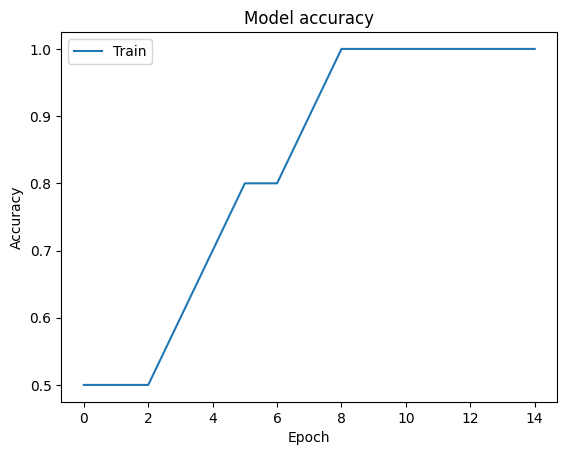

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(history.history['accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Po zakończeniu treningu warstwa osadzania nauczyła się wag, które są niczym innym jak reprezentacjami wektorowymi każdego słowa. Sprawdźmy kształt macierzy wag.

In [19]:
# rozmiar słownika (korpusu) = 50
# ustalony arbitralnie rozmiar wektora embedding = 8

print(embedding_layer.get_weights()[0].shape)

(50, 8)


In [20]:
# Jeśli sprawdzimy osadzenie dla pierwszego słowa, otrzymamy następujący wektor.
em_after = embedding_layer.get_weights()[0][0]


In [21]:
em_after

array([-0.02690884, -0.02422262,  0.05507443,  0.01022518, -0.04024628,  0.02737164, -0.02125562, -0.0151292 ], dtype=float32)

In [22]:
# współczynniki wagowe po procesie uczenia
weights = model.get_layer('wmi-embedding').get_weights()[0]
weights

array([[-0.02690884, -0.02422262,  0.05507443,  0.01022518, -0.04024628,  0.02737164, -0.02125562, -0.0151292 ],
       [ 0.04763052, -0.04823155,  0.02261137, -0.01256844, -0.0029161 , -0.04878147,  0.02084836, -0.04064719],
       [-0.04801153, -0.02494357, -0.01177223,  0.04566591, -0.00452286,  0.03875289,  0.03002458,  0.00791993],
       [ 0.04504495,  0.04011748, -0.03543152, -0.02798506, -0.02060809,  0.04943073,  0.00635544,  0.00505408],
       [-0.00028249, -0.0186724 ,  0.02809239,  0.01999566,  0.00810785,  0.01212832,  0.02312529,  0.0381322 ],
       [ 0.03482474, -0.02079005,  0.04581055,  0.00727286, -0.00506257, -0.03989236,  0.02831067, -0.03932198],
       [ 0.04783882,  0.02030855,  0.02323614,  0.03366464, -0.03266615,  0.01919073,  0.00108555, -0.00458878],
       [-0.0095186 , -0.02644819,  0.0065698 , -0.02194588, -0.02471144, -0.02824371,  0.03733552,  0.04996787],
       [-0.04765875, -0.04798825, -0.00621372, -0.04674224,  0.03407266,  0.0366099 , -0.0362514

In [33]:
print("before :",em_before )

print("after  :", em_after)

before : [-0.0419511  -0.03908299  0.04004708  0.02502891 -0.02521975  0.01234521 -0.03626658 -0.00020619]
after  : [-0.02690884 -0.02422262  0.05507443  0.01022518 -0.04024628  0.02737164 -0.02125562 -0.0151292 ]


**Przygotowanie danych do prezentacji współczynników wagowych wyuczonej warstwy Embedding  na platformie Embedding Projector**

In [34]:
# definicja funkcji standaryzującej

import tensorflow as tf

def custom_standardization(input_data):
  lowercase = tf.strings.lower(input_data)

  return lowercase


In [35]:
from tensorflow.keras.layers import TextVectorization

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=Vocab_size,
    output_mode='int',
    output_sequence_length=max_length)



In [36]:
vectorize_layer.adapt(reviews)

In [37]:
vocab = vectorize_layer.get_vocabulary()


In [38]:
vocab

['',
 '[UNK]',
 'horrible',
 'awesome',
 'work',
 'waitress',
 'services!',
 'service',
 'rude',
 'rocks',
 'poor',
 'never',
 'have',
 'food!',
 'food',
 'done',
 "couldn't",
 'coming',
 'cold',
 'better',
 'back!']

In [39]:
import io
import os
out_v = io.open('/content/drive/MyDrive/dane/modele/vectors01.tsv', 'w', encoding='utf-8')
out_m = io.open('/content/drive/MyDrive/dane/modele/metadata01.tsv', 'w', encoding='utf-8')

for index, word in enumerate(vocab):
  if index == 0:
    continue  # pomijając 0, bo jest to wypełnienie.
  vec = weights[index]
  out_v.write('\t'.join([str(x) for x in vec]) + "\n")
  out_m.write(word + "\n")
out_v.close()
out_m.close()

In [40]:
try:
  from google.colab import files
  files.download('/content/drive/MyDrive/dane/modele/vectors01.tsv')
  files.download('/content/drive/MyDrive/dane/modele/metadata01.tsv')
except Exception:
  pass

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Zapisać dane do katalogu: C:\_T

!!! analiza relacji do słowa : awesom

 http://projector.tensorflow.org/?_gl=1*rggcgk*_ga*NzAyNjA5OTg4LjE2OTQ1MDIxMDc.*_ga_W0YLR4190T*MTcwMDgyODU5Ny44LjEuMTcwMDgzMDA3MS4wLjAuMA..
